In [2]:
import os
import random
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

model = keras.Sequential([
layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation="relu"),
layers.MaxPooling2D((2, 2)),
layers.Flatten(),
layers.Dense(128, activation="relu"),
layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

predictions = model.predict(x_test[:5])
predicted_labels = np.argmax(predictions, axis=1)
print("Predicted labels:", predicted_labels)
print("Actual labels: ", y_test[:5])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 44ms/step - accuracy: 0.9035 - loss: 0.3073 - val_accuracy: 0.9829 - val_loss: 0.0524
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 130s 38ms/step - accuracy: 0.9859 - loss: 0.0465 - val_accuracy: 0.9884 - val_loss: 0.0344
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 31ms/step - accuracy: 0.9908 - loss: 0.0281 - val_accuracy: 0.9879 - val_loss: 0.0367
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 39ms/step - accuracy: 0.9939 - loss: 0.0195 - val_accuracy: 0.9920 - val_loss: 0.0272
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 92s 49ms/step - accuracy: 0.9949 - loss: 0.0154 - val_accuracy: 0.9910 - val_loss: 0.0292
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9880 - loss: 0.0379
Test accuracy: 0.9910
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Predicted labels: [7 2 1 0 4]
Actual labels:  [7 2 1 0 4]


Exercise

Task 1: Data Understanding and Visualization:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
train_path = '/content/drive/MyDrive/AI ML/Workshop 5/FruitinAmazon/FruitinAmazon/train'
test_path = '/content/drive/MyDrive/AI & ML/Workshop 5/FruitinAmazon/FruitinAmazon/test'

In [8]:
class_dirs = [d for d in os.listdir(train_path)
                    if os.path.isdir(os.path.join(train_path, d))]
class_dirs.sort()
print("Found classes:", class_dirs)

Found classes: ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


In [9]:
num_classes = len(class_dirs)
cols = (num_classes + 1) // 2

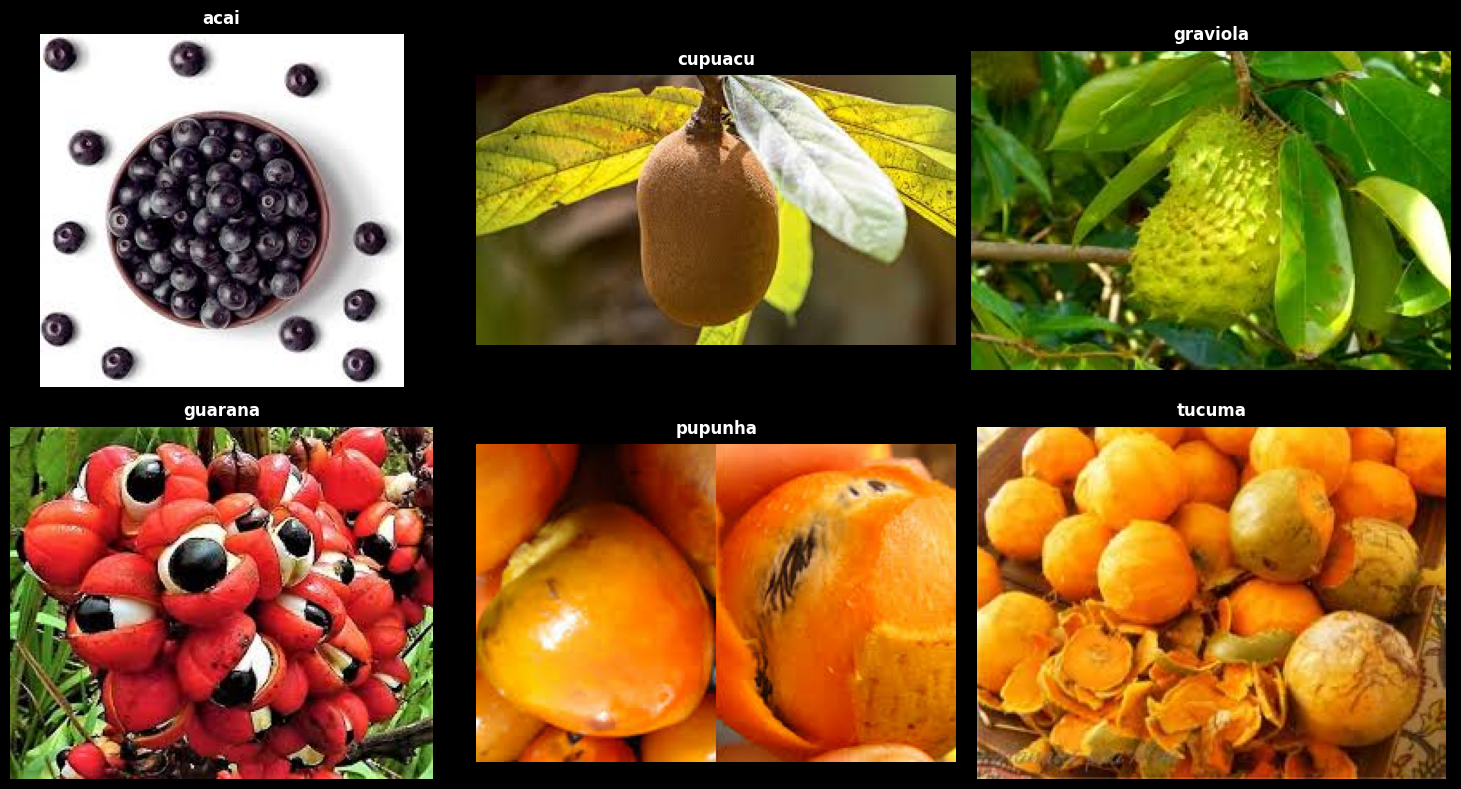

In [12]:
plt.style.use('dark_background')

fig, axes = plt.subplots(2, cols, figsize=(15, 8))

for i, class_name in enumerate(class_dirs):
    class_path = os.path.join(train_path, class_name)
    images = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]

    if images:
        random_image = random.choice(images)
        img_path = os.path.join(class_path, random_image)

        try:
            img = Image.open(img_path)

            ax = axes[i // cols, i % cols] if isinstance(axes, np.ndarray) else axes
            ax.imshow(img)
            ax.set_title(class_name, fontsize=12, fontweight='bold', pad=8, color='white')
            ax.set_xticks([])
            ax.set_yticks([])
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['left'].set_visible(False)
            ax.spines['bottom'].set_visible(False)

        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
    else:
        print(f"No images found in class: {class_name}")

plt.tight_layout()
plt.show()


 **Observation:**

  The training folder of the dataset contains six Amazonian fruit classes: acal, cupuacu, graviola, guarana, pupunha, and tucuma, as indicated by the output. This list clarifies the different fruit types included.

**2. Check for Corrupted Image:**

In [13]:
from PIL import ImageFile

def check_and_remove_corrupted_images(directory):
    corrupted_images = []

    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)

            if not file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                continue
            try:
                with Image.open(file_path) as img:
                    img.verify()
                with Image.open(file_path) as img:
                    img.load()
            except (IOError, SyntaxError, Image.DecompressionBombError) as e:
                print(f"Removed corrupted image: {file_path} - Error: {str(e)}")
                corrupted_images.append(file_path)
                os.remove(file_path)
    return corrupted_images
corrupted = check_and_remove_corrupted_images(train_path)
if not corrupted:
    print("No corrupted images found.")
else:
    print(f"\nTotal corrupted images removed: {len(corrupted)}")

No corrupted images found.


**Task 2: Loading and Preprocessing Image Data in keras:**

In [21]:
import tensorflow as tf

train_dir = '/content/drive/MyDrive/AI ML/Workshop 5/FruitinAmazon/FruitinAmazon/train'
img_height, img_width = 128, 128
batch_size = 32
validation_split = 0.2
seed = 123

train_ds_unmapped = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset='training',
    seed=seed
)

val_ds_unmapped = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    validation_split=validation_split,
    subset='validation',
    seed=seed
)

class_names = train_ds_unmapped.class_names
print("Class names:", class_names)
normalization = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds_unmapped.map(lambda x, y: (normalization(x), y))
val_ds = val_ds_unmapped.map(lambda x, y: (normalization(x), y))

for images, labels in train_ds.take(1):
    print("\nFirst training batch:")
    print("Images shape:", images.shape)
    print("Labels shape:", labels.shape)
    print("Pixel value range: ({:.2f}, {:.2f})".format(
        tf.reduce_min(images).numpy(),
        tf.reduce_max(images).numpy()
    ))

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.
Class names: ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']

First training batch:
Images shape: (32, 128, 128, 3)
Labels shape: (32,)
Pixel value range: (0.00, 1.00)


**Task 3 - Implement a CNN with**

In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_cnn_model(input_shape=(128, 128, 3), num_classes=6):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), strides=1, padding='same', activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2), strides=2),
        layers.Conv2D(32, (3, 3), strides=1, padding='same', activation='relu'),
        layers.MaxPooling2D((2, 2), strides=2),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

model = create_cnn_model(input_shape=(img_height, img_width, 3), num_classes=len(class_names))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

**Task 4: Compile the Model**

In [24]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

extra_metrics = [
    tf.keras.metrics.SparseTopKCategoricalAccuracy(k=2, name='top2_accuracy'),
    tf.keras.metrics.SparseCategoricalCrossentropy(name='xentropy')
]
print("Model successfully compiled!")
print("Optimizer:", model.optimizer.get_config()['name'])
print("Loss function:", model.loss)
print("Metrics:", [m.name for m in model.metrics])

Model successfully compiled!
Optimizer: adam
Loss function: sparse_categorical_crossentropy
Metrics: ['loss', 'compile_metrics']


**Task 4: Train the Model**

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 542ms/step - accuracy: 0.9797 - loss: 0.0568
Epoch 1: val_accuracy improved from -inf to 0.83333, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 797ms/step - accuracy: 0.9813 - loss: 0.0547 - val_accuracy: 0.8333 - val_loss: 0.6789
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 602ms/step - accuracy: 0.9954 - loss: 0.0315
Epoch 2: val_accuracy did not improve from 0.83333
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 847ms/step - accuracy: 0.9931 - loss: 0.0352 - val_accuracy: 0.8333 - val_loss: 0.4197
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step - accuracy: 0.9902 - loss: 0.0290
Epoch 3: val_accuracy improved from 0.83333 to 0.94444, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 535ms/step - accuracy: 0.9891 - loss: 0.0315 - val_accuracy: 0.9444 - val_loss: 0.6450
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - accuracy: 0.9797 - loss: 0.1396
Epoch 4: val_accuracy did not improve from 0.94444
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 518ms/step - accuracy: 0.9813 - loss: 0.1305 - val_accuracy: 0.7778 - val_loss: 1.0700
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 594ms/step - accuracy: 0.9902 - loss: 0.0660
Epoch 5: val_accuracy did not improve from 0.94444
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 774ms/step - accuracy: 0.9891 - loss: 0.0677 - val_accuracy: 0.7778 - val_loss: 0.7054
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 1.0000 - loss: 0.0200
Epoch 6: val_accuracy did not improve from 0.94444
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 456ms/step - accuracy: 1.0000 - loss: 0.0197 - val_accuracy: 0.8889 - val_loss: 0.2703
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 1.0000 - loss: 0.0300
Epoch 7: val_accuracy did not improve from 0.94

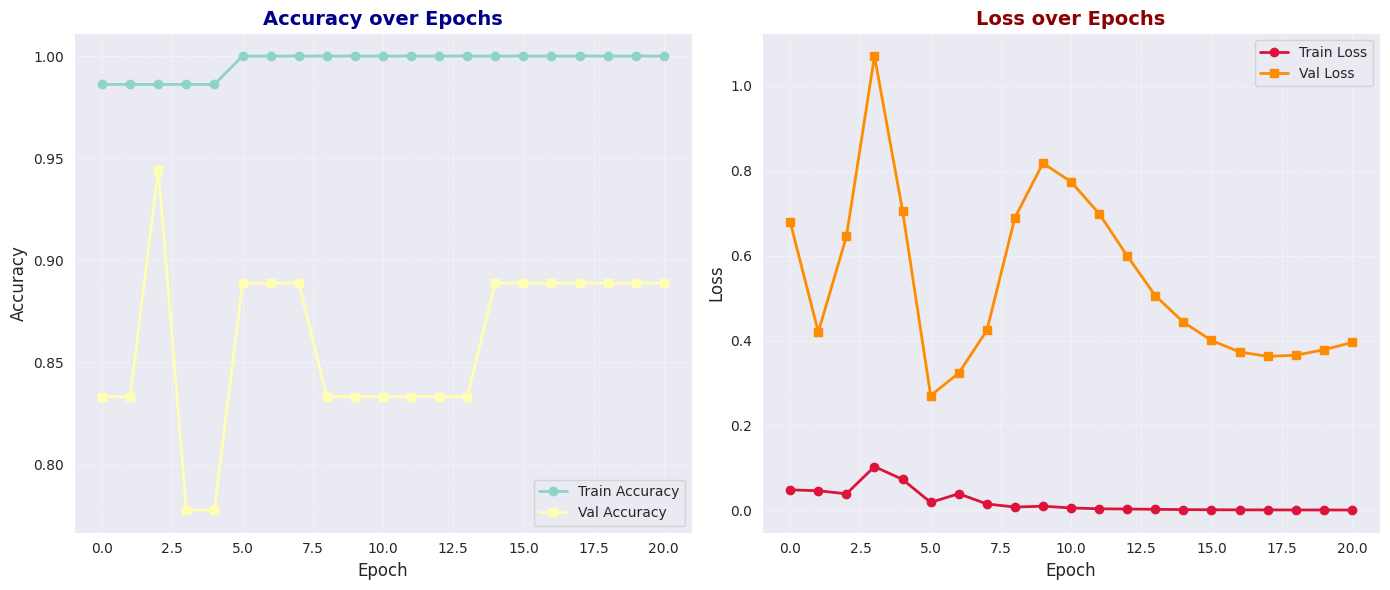

In [27]:
import seaborn as sns
sns.set_style("darkgrid")
import numpy as np
from sklearn.metrics import classification_report
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath='best_model.h5',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=1
    )
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    batch_size=16,
    callbacks=callbacks,
    verbose=1
)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='s', linewidth=2)
plt.title('Accuracy over Epochs', fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)  # Manual grid settings

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o', linewidth=2, color='crimson')
plt.plot(history.history['val_loss'], label='Val Loss', marker='s', linewidth=2, color='darkorange')
plt.title('Loss over Epochs', fontsize=14, fontweight='bold', color='darkred')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)  # Manual grid settings

plt.tight_layout()
plt.show()


**Task 5: Evaluate the Model**

In [29]:
test_dir = '/content/drive/MyDrive/AI ML/Workshop 5/FruitinAmazon/FruitinAmazon/test'
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int'
).map(lambda x, y: (normalization(x), y))

test_loss, test_acc = model.evaluate(test_ds)
print(f'\nTest Accuracy: {test_acc:.4f}')
print(f'Test Loss: {test_loss:.4f}')

Found 30 files belonging to 6 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.6000 - loss: 0.9432

Test Accuracy: 0.6000
Test Loss: 0.9432


**Task 6: Save and Load the Model**

In [30]:
model.save('fruit_classifier.h5')
loaded_model = tf.keras.models.load_model('fruit_classifier.h5')
loaded_loss, loaded_acc = loaded_model.evaluate(test_ds)
print(f'\nLoaded Model Test Accuracy: {loaded_acc:.4f}')
print(f'Loaded Model Test Loss: {loaded_loss:.4f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 703ms/step - accuracy: 0.6000 - loss: 0.9432

Loaded Model Test Accuracy: 0.6000
Loaded Model Test Loss: 0.9432


**Task 7: Predictions and Classification Report**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step

Classification Report:
              precision    recall  f1-score   support

        acai       1.00      0.60      0.75         5
     cupuacu       0.67      0.40      0.50         5
    graviola       0.50      1.00      0.67         5
     guarana       0.50      0.80      0.62         5
     pupunha       1.00      0.40      0.57         5
      tucuma       0.50      0.40      0.44         5

    accuracy                           0.60        30
   macro avg       0.69      0.60      0.59        30
weighted avg       0.69      0.60      0.59        30



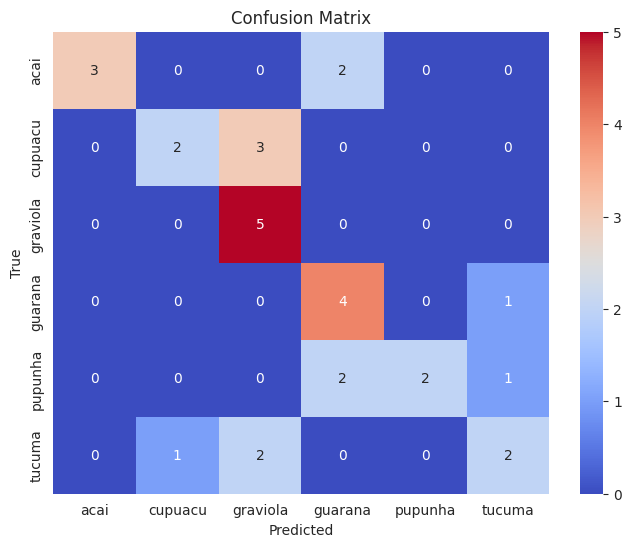

In [31]:
import numpy as np
from sklearn.metrics import classification_report

y_true = []
y_pred = []
for images, labels in test_ds:
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(loaded_model.predict(images), axis=1))
print('\nClassification Report:')
print(classification_report(
    y_true,
    y_pred,
    target_names=class_names
))

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()